In [1]:
%matplotlib inline
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

from datetime import datetime

from multiprocessing import Pool

In [2]:
datafiles2019 = !ls /media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.*
datafiles2020 = !ls /media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2020.*
datafiles = datafiles2019 + datafiles2020

In [3]:
def digest_data(filedir):
    stream = obspy.read(filedir)
    stream.detrend('demean')
    stream.normalize()
    stream[0].data = filter.highpass(stream[0].data, freq=40, df=1000)
    stream[0].data = filter.lowpass(stream[0].data, freq=5, df=1000)
    return stream

In [54]:
def make_template():
    template_dir = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
    template = digest_data(template_dir)
    pick = UTC('2019-05-18T11:57:41.532000Z')
    template = template.trim(pick-0.025, pick+0.25)
    return template

def make_template_1():
    template_dir = '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.274'
    template = digest_data(template_dir)
    pick1 = UTC('2019-10-01T12:32:11.92Z')
    pick2 = UTC('2019-10-01T12:32:12.13Z')
#     pick = UTC('2019-05-18T11:57:41.532000Z')
#     template = template.trim(pick-0.025, pick+0.25)
    template = template.trim(pick1, pick2)
    return template

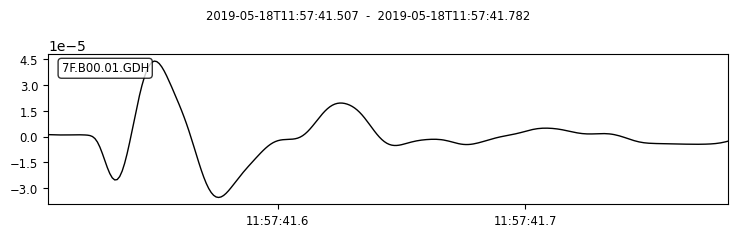

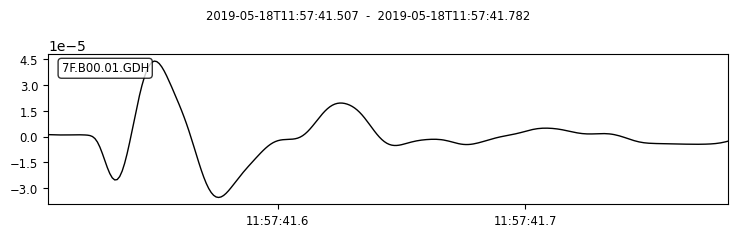

In [55]:
t1 = make_template()
t1.plot()

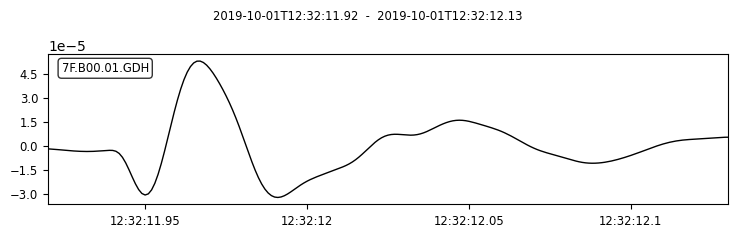

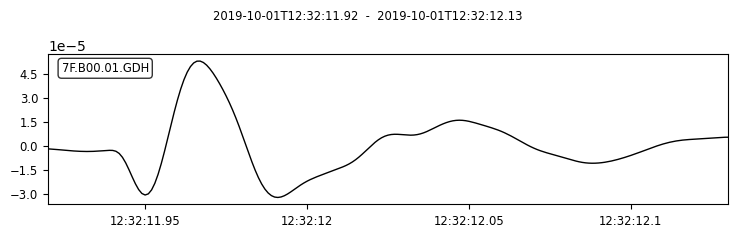

In [56]:
t2 = make_template_1()
# pick = UTC('2019-10-01T12:32:11.90Z')
# z = t2.plot(starttime=pick
#        ,endtime=UTC('2019-10-01T12:32:12.10Z'))
t2.plot()

In [57]:
np.diff(t1[0].times()).mean()

0.001

In [58]:
np.diff(t2[0].times()).mean()

0.001

In [64]:
# np.correlate(a=t1[0].data, v=t2[0].data).mean()

-5.2060973905764293e-09

[]

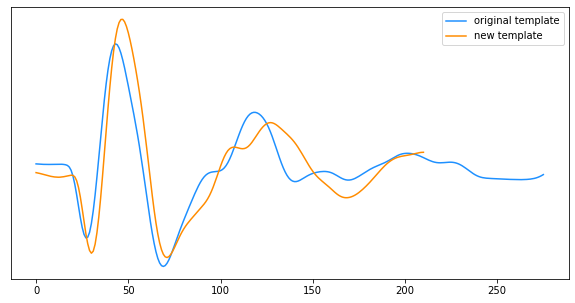

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(t1[0].data, label='original template', color='dodgerblue')
ax.plot(t2[0].data, label='new template', color='darkorange')
ax.legend()
ax.set_yticks([])

In [74]:
def find_template_in_data(datadir):
    data = digest_data(datadir)
    height = 0.875
    distance = 3
    detections, sims = correlation_detector(stream=data
#                                         , templates=template
                                        , templates=[t1, t2]
                                        , heights=height
                                        , distance=distance
                                        , plot=None)
    data_writing_location = '/media/sda/data/borehole/detections/' + datadir.split('.')[-1]
    sims[0].write(data_writing_location + 'similarity.mseed', format='MSEED')
    df = pd.DataFrame(detections, index=False)
    df.to_csv(data_writing_location + 'detections.csv')
    del detections, sims, df, data

In [72]:
# find_template_in_data(datafiles[10])

start = datetime.now()
pool = Pool()
pool.map(find_template_in_data, datafiles)
pool.close()
print('this took', datetime.now()-start)

In [73]:
datafiles[10].split('.')[-1]

'131'

In [43]:
template = make_template()

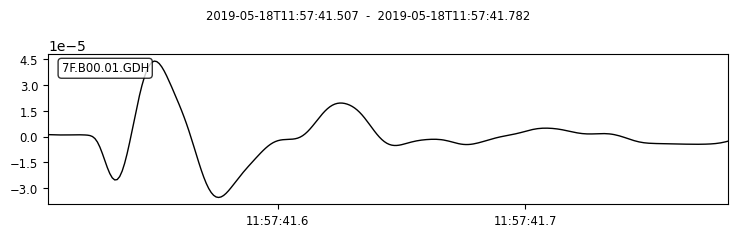

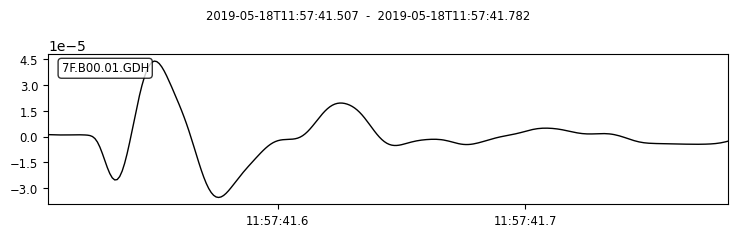

In [44]:
template.plot()

In [51]:
height = 0.8
distance = 3
#these should both be streams not traces
detections, sims = correlation_detector(stream=data
                                        , templates=template
                                        , heights=height
                                        , distance=distance
                                        , plot=None)

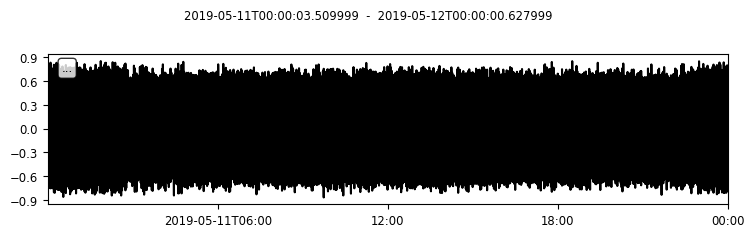

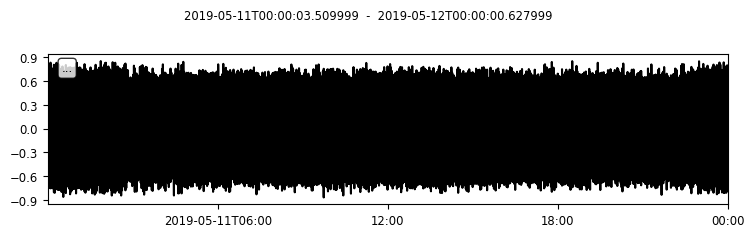

In [55]:
sims[0].plot()

In [60]:
pd.DataFrame(detections)

,time,similarity,template_id
0,2019-05-11T00:06:20.051999Z,0.833305,0
1,2019-05-11T00:13:27.755999Z,0.806846,0
2,2019-05-11T00:19:06.155999Z,0.831342,0
3,2019-05-11T00:23:24.655999Z,0.819035,0
4,2019-05-11T00:38:41.157999Z,0.803689,0
5,2019-05-11T01:00:25.974999Z,0.818805,0
6,2019-05-11T01:02:05.726999Z,0.830727,0
7,2019-05-11T01:18:38.154999Z,0.814069,0
8,2019-05-11T01:42:17.557999Z,0.805997,0
9,2019-05-11T01:52:28.554999Z,0.852744,0
